In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('C:/Users/Bodi/Desktop/Covid Data.csv')

In [3]:
df = dataset.copy()
df.head() 

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
df.shape

(1048575, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [6]:
df.isna().any()

USMER                   False
MEDICAL_UNIT            False
SEX                     False
PATIENT_TYPE            False
DATE_DIED               False
INTUBED                 False
PNEUMONIA               False
AGE                     False
PREGNANT                False
DIABETES                False
COPD                    False
ASTHMA                  False
INMSUPR                 False
HIPERTENSION            False
OTHER_DISEASE           False
CARDIOVASCULAR          False
OBESITY                 False
RENAL_CHRONIC           False
TOBACCO                 False
CLASIFFICATION_FINAL    False
ICU                     False
dtype: bool

In [7]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [8]:
df.DATE_DIED.value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [9]:
df.PREGNANT.value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [10]:
df.INTUBED.value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [11]:
df.ICU.value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [12]:
# Getting rid of the missing values of features except "INTUBED", "PREGNANT", "ICU"
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

In [13]:

df.shape

(1025152, 21)

In [14]:
df.head(10) 

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [15]:
#new Y column 2:alive   1:Died
df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

In [16]:
df.PREGNANT.value_counts()

97    511936
2     502200
1       7841
98      3175
Name: PREGNANT, dtype: int64

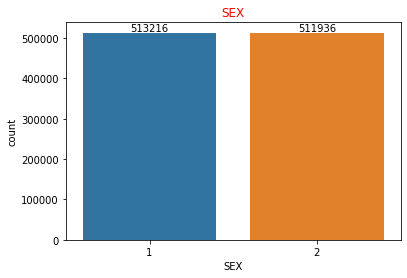

In [17]:
# showing sex column
plt.figure()
ax = sns.countplot(x=df.SEX, )
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("SEX",color="red");

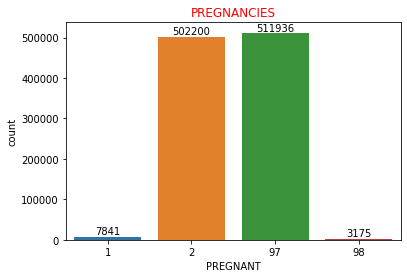

In [18]:
# showing prignancy column
plt.figure()
ax = sns.countplot(x=df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES",color="red");

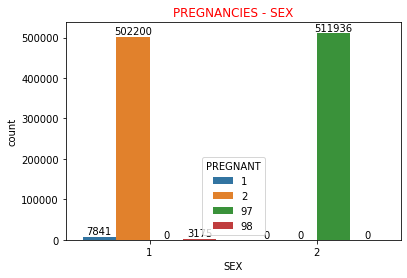

In [19]:
# showing prignancy & sex column
plt.figure()
ax = sns.countplot(x=df.SEX, hue = df['PREGNANT'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX",color="red");

In [20]:
df.PREGNANT = df.PREGNANT.replace(97,2) 

# Getting rid of the missing values
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

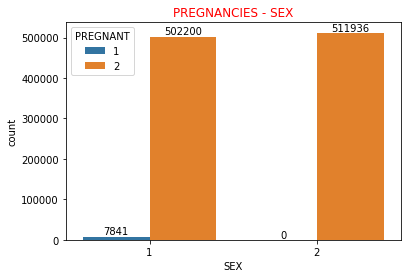

In [21]:
plt.figure()
ax = sns.countplot(x=df.SEX, hue = df['PREGNANT'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX",color="red");

In [22]:
df.head(10) 

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,2,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,2,1,...,2,1,2,2,2,2,2,3,97,1
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,3,2,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,3,97,2
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,1,1,2,2,2,1,2,3,97,2
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,1,2,2,1,2,2,3,2,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,3,2,2


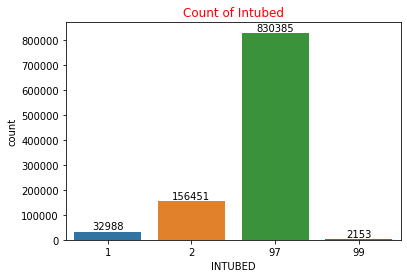

In [23]:
#alot of null
ax = sns.countplot(x=df.INTUBED)
plt.bar_label(ax.containers[0])
plt.title("Count of Intubed",color="red");

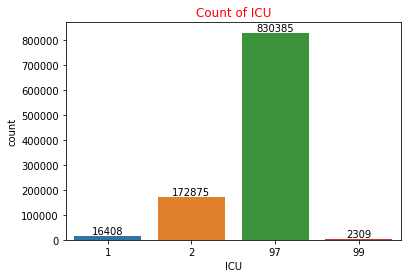

In [24]:
#alot of null
ax = sns.countplot(x=df.ICU)
plt.bar_label(ax.containers[0])
plt.title("Count of ICU",color="red");

In [25]:
#too much null so we droped them
df.drop(columns=["INTUBED","ICU","DATE_DIED"], inplace=True)

In [26]:
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,3,1
5,2,1,1,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,2,64,2,2,2,2,2,2,2,2,2,2,2,3,2
7,2,1,1,1,1,64,2,1,2,2,1,1,2,2,2,1,2,3,2
8,2,1,1,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2


In [27]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
PNEUMONIA                 2
AGE                     121
PREGNANT                  2
DIABETES                  2
COPD                      2
ASTHMA                    2
INMSUPR                   2
HIPERTENSION              2
OTHER_DISEASE             2
CARDIOVASCULAR            2
OBESITY                   2
RENAL_CHRONIC             2
TOBACCO                   2
CLASIFFICATION_FINAL      7
DEATH                     2
dtype: int64

# data visualization

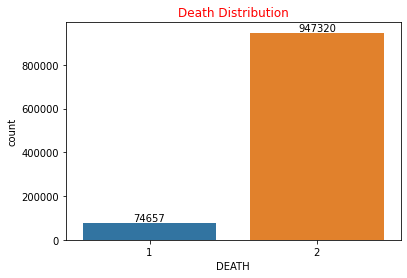

In [28]:
#visualizing DEATH 'Y' column
ax = sns.countplot(x=df.DEATH)
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", color="red");


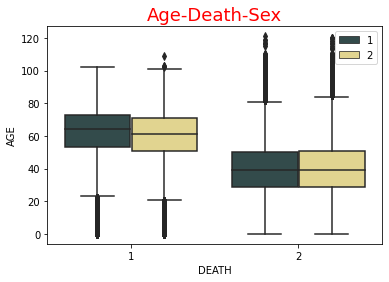

In [29]:
sns.boxplot(x="DEATH", y="AGE",hue="SEX",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-Death-Sex",fontsize=18, color="red")
plt.legend(loc="best");

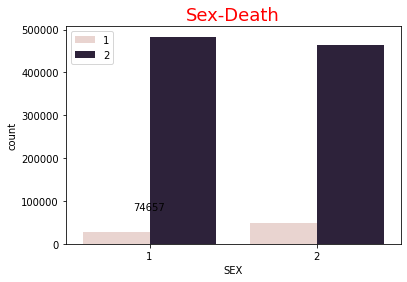

In [30]:
sns.countplot(x=df.SEX,hue=df.DEATH, palette=sns.cubehelix_palette(2))
plt.title("Sex-Death",fontsize=18, color="red")
plt.bar_label(ax.containers[0])
plt.legend(loc="best");


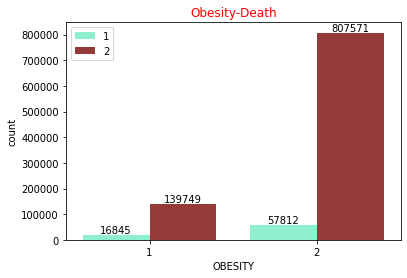

In [31]:
ax=sns.countplot(x=df.OBESITY,hue=df.DEATH, palette=sns.color_palette(["#7fffd4","#a52a2a"]))
plt.title("Obesity-Death",color="red")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.legend(loc="best");

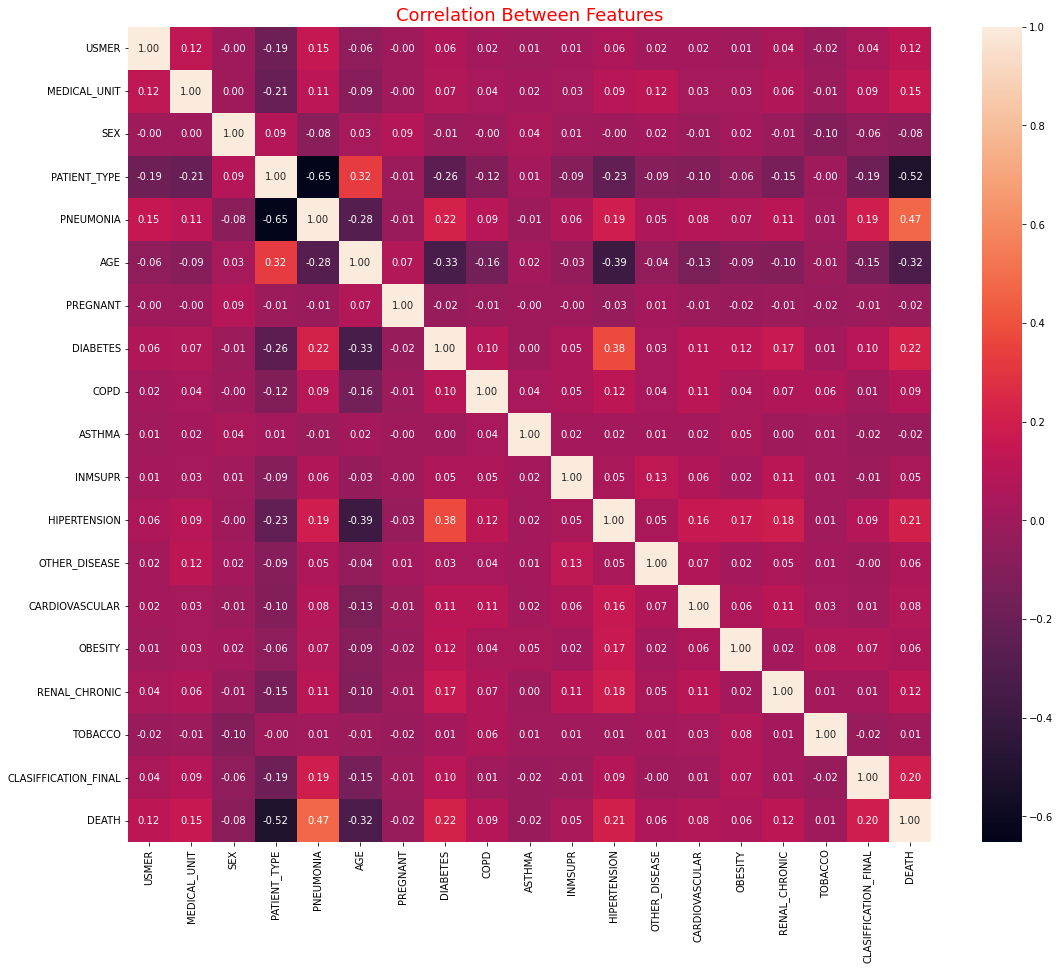

In [32]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red");

# Feature selection

In [33]:
#Depending on correlation we decided to drop unrelevant columns
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

df.drop(columns=unrelevant_columns,inplace=True)

In [34]:
df.head(10)

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,65,2,1,2,3,1
1,2,1,1,1,72,2,1,1,5,1
2,2,1,2,2,55,1,2,2,3,1
3,2,1,1,2,53,2,2,2,7,1
4,2,1,1,2,68,1,1,2,3,1
5,2,1,2,1,40,2,2,2,3,2
6,2,1,1,2,64,2,2,2,3,2
7,2,1,1,1,64,1,1,1,3,2
8,2,1,2,2,37,1,1,2,3,2
9,2,1,2,2,25,2,2,2,3,2


In [35]:
#label encoding "MEDICAL_UNIT","CLASIFFICATION_FINAL"
df = pd.get_dummies(df,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"])

In [36]:
df.head(10)

,USMER,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,DEATH,MEDICAL_UNIT_1,MEDICAL_UNIT_2,...,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_1,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,2,1,1,65,2,1,2,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,72,2,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2,2,2,55,1,2,2,1,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2,1,2,53,2,2,2,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2,1,2,68,1,1,2,1,1,0,...,0,0,0,0,0,1,0,0,0,0
5,2,2,1,40,2,2,2,2,1,0,...,0,0,0,0,0,1,0,0,0,0
6,2,1,2,64,2,2,2,2,1,0,...,0,0,0,0,0,1,0,0,0,0
7,2,1,1,64,1,1,1,2,1,0,...,0,0,0,0,0,1,0,0,0,0
8,2,2,2,37,1,1,2,2,1,0,...,0,0,0,0,0,1,0,0,0,0
9,2,2,2,25,2,2,2,2,1,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
#IQR for outlayers in AGE column
data=df.AGE
Q1 = data. quantile (0.25)
Q3 = data .quantile(0.75)
IQR = Q3 - Q1
print (IQR)

23.0


In [38]:
#feature scaling for AGE column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
df[['AGE']] = scaler.fit_transform(df[['AGE']])


In [39]:
df.head(10)

,USMER,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,DEATH,MEDICAL_UNIT_1,MEDICAL_UNIT_2,...,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_1,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,2,1,1,1.379421,2,1,2,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,1.797343,2,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2,2,2,0.782389,1,2,2,1,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2,1,2,0.662983,2,2,2,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2,1,2,1.558531,1,1,2,1,1,0,...,0,0,0,0,0,1,0,0,0,0
5,2,2,1,-0.113158,2,2,2,2,1,0,...,0,0,0,0,0,1,0,0,0,0
6,2,1,2,1.319718,2,2,2,2,1,0,...,0,0,0,0,0,1,0,0,0,0
7,2,1,1,1.319718,1,1,1,2,1,0,...,0,0,0,0,0,1,0,0,0,0
8,2,2,2,-0.292268,1,1,2,2,1,0,...,0,0,0,0,0,1,0,0,0,0
9,2,2,2,-1.008706,2,2,2,2,1,0,...,0,0,0,0,0,1,0,0,0,0


In [40]:
#spliting the data into features and labels
x = df.drop(columns="DEATH")
y = df["DEATH"]

In [41]:
x

,USMER,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,MEDICAL_UNIT_1,MEDICAL_UNIT_2,MEDICAL_UNIT_3,...,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_1,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,2,1,1,1.379421,2,1,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,1.797343,2,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,2,2,0.782389,1,2,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,1,2,0.662983,2,2,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,1,2,1.558531,1,1,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,1,2,-0.113158,2,2,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1048571,1,2,2,0.543577,2,1,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1048572,2,1,2,0.782389,2,2,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1048573,2,1,2,-0.829596,2,2,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [42]:
y

0          1
1          1
2          1
3          1
4          1
          ..
1048570    2
1048571    2
1048572    2
1048573    2
1048574    2
Name: DEATH, Length: 1021977, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (817581, 27)
Test_x : (204396, 27)
Train_y : (817581,)
Test_y : (204396,)


# Logistic Regresion

In [44]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9394313000254408


C:\Users\Bodi\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
y_pred = logreg.predict(test_x)
print('Predicted Value for logistic regression Model is : ' , y_pred[:10])

Predicted Value for logistic regression Model is :  [2 2 1 2 2 2 2 2 2 2]


In [46]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
# accuracy_score
from sklearn.metrics import accuracy_score
# recall_score
from sklearn.metrics import recall_score
# precision_score
from sklearn.metrics import precision_score
# f1_score
from sklearn.metrics import f1_score

In [47]:
#Calculating accuracy_score
AccScore = accuracy_score(test_y, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  192016


In [48]:
#Calculating precision_score
PrecisionScore = precision_score(test_y, y_pred, average='micro')
print('Precision Score is : ', PrecisionScore)

Precision Score is :  0.9394313000254408


In [49]:
#Calculating recall_score
RecallScore = recall_score(test_y, y_pred, average='micro')
print('Recall Score is : ', RecallScore)

Recall Score is :  0.9394313000254408


In [50]:
#Calculating f1_score
F1Score = f1_score(test_y, y_pred, average='micro') 
print('F1 Score is : ', F1Score)

F1 Score is :  0.9394313000254408


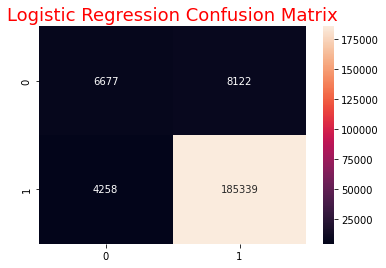

In [51]:
#Calculating (print) Confusion Matrix
sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");

# SVC

In [52]:
from sklearn.svm import SVC
SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
max_iter=100,C=1.0,gamma='auto')
SVCModel.fit(train_x,train_y)

#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(train_x,train_y))
print('SVCModel Test Score is : ' , SVCModel.score(test_x,test_y))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = SVCModel.predict(test_x)
print('Predicted Value for SVCModel is : ' , y_pred[:10])


C:\Users\Bodi\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVCModel Train Score is :  0.9228198796204902
SVCModel Test Score is :  0.9237998786669015
----------------------------------------------------
Predicted Value for SVCModel is :  [2 2 2 2 2 2 2 2 2 2]


# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
'''
#sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights=, algorithm=’auto’, leaf_size=30,
#                                      p=2, metric=’minkowski’, metric_params=None,n_jobs=None)
'''
KNeighborsClassifierModel = KNeighborsClassifier(n_neighbors = 5, weights='uniform', #also can be : distance, or defined function 
                                               algorithm = 'auto')    #also can be : ball_tree ,  kd_tree  , brute
KNeighborsClassifierModel.fit(train_x, train_y)

#Calculating Details
print('KNeighborsRegressorModel Train Score is : ' , KNeighborsClassifierModel.score(train_x, train_y))
print('KNeighborsRegressorModel Test Score is : ' , KNeighborsClassifierModel.score(test_x,test_y))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = KNeighborsClassifierModel.predict(test_x)
print('Predicted Value for KNeighborsRegressorModel is : ' , y_pred[:10])

KNeighborsRegressorModel Train Score is :  0.9416424794607506
KNeighborsRegressorModel Test Score is :  0.9343969549306249
----------------------------------------------------
Predicted Value for KNeighborsRegressorModel is :  [2 2 1 2 2 2 2 2 2 2]


# Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
'''
sklearn.tree.DecisionTreeClassifier(criterion='gini’, splitter=’best’, max_depth=None,min_samples_split=2,
                                    min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,
                                    random_state=None, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                    min_impurity_split=None, class_weight=None,presort=False)
'''
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(train_x, train_y)

#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(train_x, train_y))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(test_x, test_y))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = DecisionTreeClassifierModel.predict(test_x)
print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:10])


DecisionTreeClassifierModel Train Score is :  0.9324397215688721
DecisionTreeClassifierModel Test Score is :  0.932298088025206
----------------------------------------------------
Predicted Value for DecisionTreeClassifierModel is :  [2 2 1 2 2 2 2 2 2 2]
